**Name: Manjil Budhathoki
<br>
Student Id: 24128437**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Data
train_df = pd.read_csv("Datasets/train.csv")
credit_risk_df = pd.read_csv("Datasets/credit_risk_data.csv")
test_df = pd.read_csv("Datasets/test.csv")

**As my previous train data have no missing value,and while doing some research i found that there is a missing data in the orginal dataset so i merge it..**

In [5]:
# Merge train.csv and credit_risk_data.csv
df_train = pd.concat([train_df, credit_risk_df], axis=0, ignore_index=True)

In [6]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0.0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1.0,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2.0,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3.0,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4.0,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Dataset Overview

In [7]:
df_train.shape

(91226, 13)

In [8]:
test_df.shape

(39098, 12)

**We have two datasets:**

- Merged Train Dataset (df_train.csv): `91,226` entries, `13 columns`.

- Test Dataset (test.csv): `39,098` entries, `12 columns` (missing loan_status).


### Column Descriptions

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91226 entries, 0 to 91225
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  float64
 1   person_age                  91226 non-null  int64  
 2   person_income               91226 non-null  int64  
 3   person_home_ownership       91226 non-null  object 
 4   person_emp_length           90331 non-null  float64
 5   loan_intent                 91226 non-null  object 
 6   loan_grade                  91226 non-null  object 
 7   loan_amnt                   91226 non-null  int64  
 8   loan_int_rate               88110 non-null  float64
 9   loan_percent_income         91226 non-null  float64
 10  cb_person_default_on_file   91226 non-null  object 
 11  cb_person_cred_hist_length  91226 non-null  int64  
 12  loan_status                 91226 non-null  int64  
dtypes: float64(4), int64(5), object

In [10]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,91226.000000,9.122600e+04,90331.000000,91226.000000,88110.000000,91226.000000,91226.000000,91226.000000
mean,29322.000000,27.616480,6.477071e+04,4.732119,9350.348607,10.789508,0.163154,5.810219,0.169447
std,16929.497605,6.148115,4.793696e+04,4.025068,5848.605423,3.108998,0.097491,4.038412,0.375149
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.000000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.700000e+04,4.000000,8000.000000,10.950000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.800000e+04,7.000000,12000.000000,13.110000,0.220000,8.000000,0.000000
max,58644.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [11]:
# Droping the id column
df_train = df_train.drop(columns=['id'])

In [12]:
df_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

### Missing Values Analysis

In [13]:
test_df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [14]:
df_train.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

**There is no missing value in the test dataset but we have missing value in 3 columns in the `df_train` dataset where the column `id` we can drop it down as for the `person_emp_length` and `loan_int_rate` we need to fill then up.**

In [15]:
test_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39093    False
39094    False
39095    False
39096    False
39097    False
Length: 39098, dtype: bool

In [16]:
print(f"Duplicate Entries in Test Dataset: {test_df.duplicated().sum()}")

Duplicate Entries in Test Dataset: 0


In [17]:
print(f"Duplicate Entries in Train Dataset: {df_train.duplicated().sum()}")

Duplicate Entries in Train Dataset: 165


In [18]:
# separating NUmerical and Categorical Columns

num_features = df_train.select_dtypes(include=['int64','float64']).columns.to_list()
if 'loan_status' in num_features:
  num_features.remove('loan_status')

In [19]:
num_features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [20]:
cat_features = df_train.select_dtypes(include=['object']).columns.to_list()

In [21]:
cat_features

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

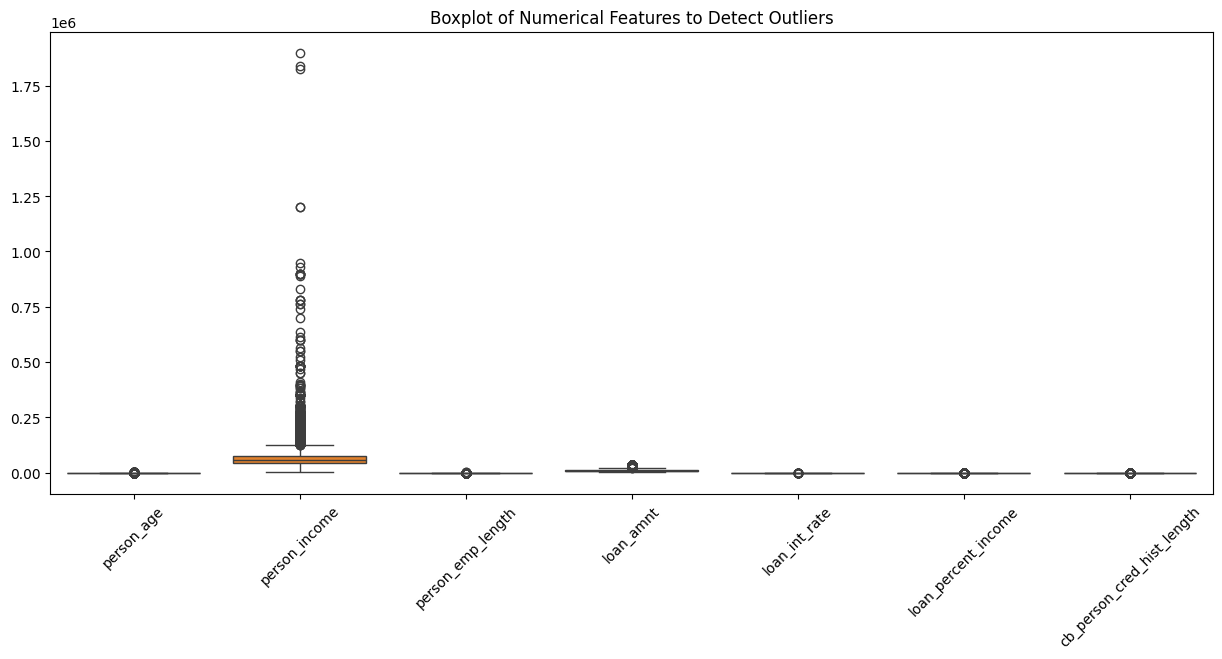

In [22]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=train_df[num_features])
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

### How to solve the outlier:

- Remove Outliers

- Cap outliers

- Transform outliers

**Capping** for `Person_income`: The extreme outliers in income could be due to high-income earners rather than errors.

**Transform** for `loan_amnt`, `loan_int_rate`, `loan_percent_income`: These features have outliers, but removing them might eliminate important high-risk cases.

Extreme Cases	Remove if necessary (IQR method) ❌ (Not recommended for now)

In [23]:
# Count the loan_status distribution
loan_status_counts = df_train['loan_status'].value_counts(normalize=True)
loan_status_counts

loan_status
0    0.830553
1    0.169447
Name: proportion, dtype: float64

C:\Users\Manjil\AppData\Local\Temp\ipykernel_20828\2192186902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette="Blues")


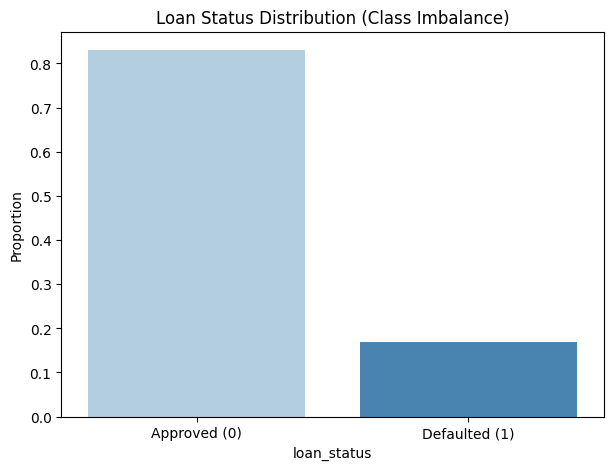

In [24]:
# Plot class distribution
plt.figure(figsize=(7,5))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette="Blues")
plt.xticks([0, 1], ["Approved (0)", "Defaulted (1)"])
plt.ylabel("Proportion")
plt.title("Loan Status Distribution (Class Imbalance)")
plt.show()

### **📌 Recommended Approach for My Dataset**
| **Method**        | **Pros** | **Cons** | **Best For** |
|------------------|---------|---------|-------------|
| **SMOTE** 🛠  | Balances data | Adds synthetic data | **Tree-based models (Random Forest, XGBoost)** |
| **Class Weights** ⚖  | No synthetic data | May not fully fix imbalance | **Logistic Regression, Linear Models** |

---
Since i am  likely using **Random Forest or XGBoost**, I will use **SMOTE**.


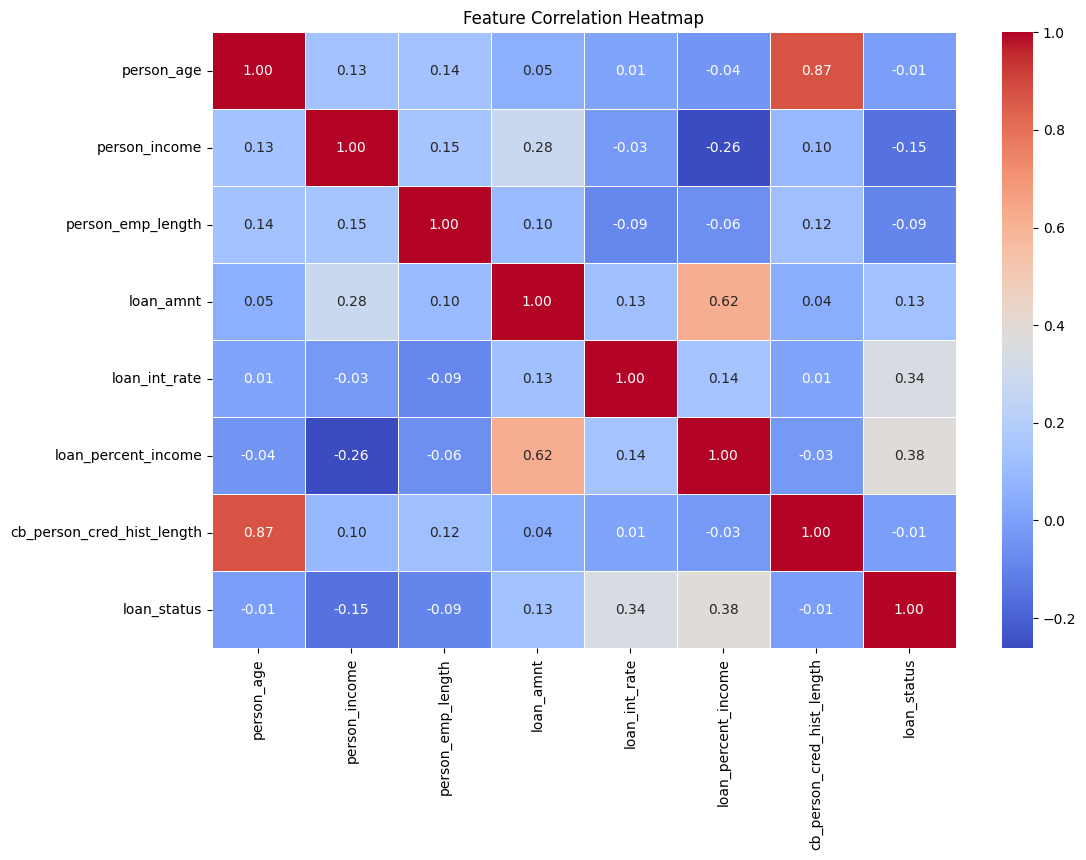

In [25]:
correlation_matrix = df_train.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Key observations:

Strong Correlation:(> 0.6 or < -0.6)
- Older individuals tend to have longer credit histories.
- Higher loan amounts take up a higher proportion of income.


Moderate Correlation (0.3 - 0.6):

- Higher interest rates increase the chances of default.
- If a loan takes a higher percentage of income, default risk increases.

Weak Correlation with loan_status (Target Variable)
- Low impact → Income alone doesn’t strongly predict default.
- Employment length has almost no effect on loan default.

### **📌 Final Recommendations**
| **Action**                      | **Reason** |
|----------------------------------|-----------|
| **Drop `person_age`**            | Highly correlated with `cb_person_cred_hist_length` (0.87) |
| **Create `debt_to_income_ratio`** | Better represents financial burden than `loan_percent_income` |
| **Create `income_interest_interaction`** | Helps understand how income & interest rates impact defaults |

---

# EDA

### Handeling Missing values

In [26]:
df_train['person_emp_length'].fillna(df_train['person_emp_length'].median(), inplace=True)

C:\Users\Manjil\AppData\Local\Temp\ipykernel_20828\3264535905.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['person_emp_length'].fillna(df_train['person_emp_length'].median(), inplace=True)


In [27]:
df_train['loan_int_rate'].fillna(df_train.groupby('loan_grade')['loan_int_rate'].transform('median'), inplace=True)

C:\Users\Manjil\AppData\Local\Temp\ipykernel_20828\2584618401.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['loan_int_rate'].fillna(df_train.groupby('loan_grade')['loan_int_rate'].transform('median'), inplace=True)


In [28]:
df_train.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

### Handling Duplicates

In [29]:
df_train = df_train.drop_duplicates().reset_index(drop=True)

In [30]:
df_train.duplicated().sum()

0

### Handeling Outlier

In [31]:
# Capping (Clipping) Outliers for `person_income` at the 99th percentile
upper_cap_income = df_train['person_income'].quantile(0.99)
df_train['person_income'] = np.where(df_train['person_income'] > upper_cap_income, upper_cap_income, df_train['person_income'])

In [32]:
# Applying Log Transformation to skewed features
skewed_features = ['loan_amnt', 'loan_int_rate', 'loan_percent_income']
for col in skewed_features:
    df_train[col] = np.log1p(df_train[col])  # log1p to avoid log(0) errors

In [33]:
df_train[["person_income"] + skewed_features].describe()

,person_income,loan_amnt,loan_int_rate,loan_percent_income
count,91060.000000,91060.000000,91060.000000,91060.000000
mean,63630.835528,8.941893,2.432100,0.147783
std,32664.125203,0.667478,0.271955,0.081064
min,4000.000000,6.216606,1.859418,0.000000
25%,40000.000000,8.517393,2.183802,0.086178
50%,57000.000000,8.987322,2.484073,0.131028
75%,78000.000000,9.392745,2.650421,0.198851
max,198070.110000,10.463132,3.187179,0.604316


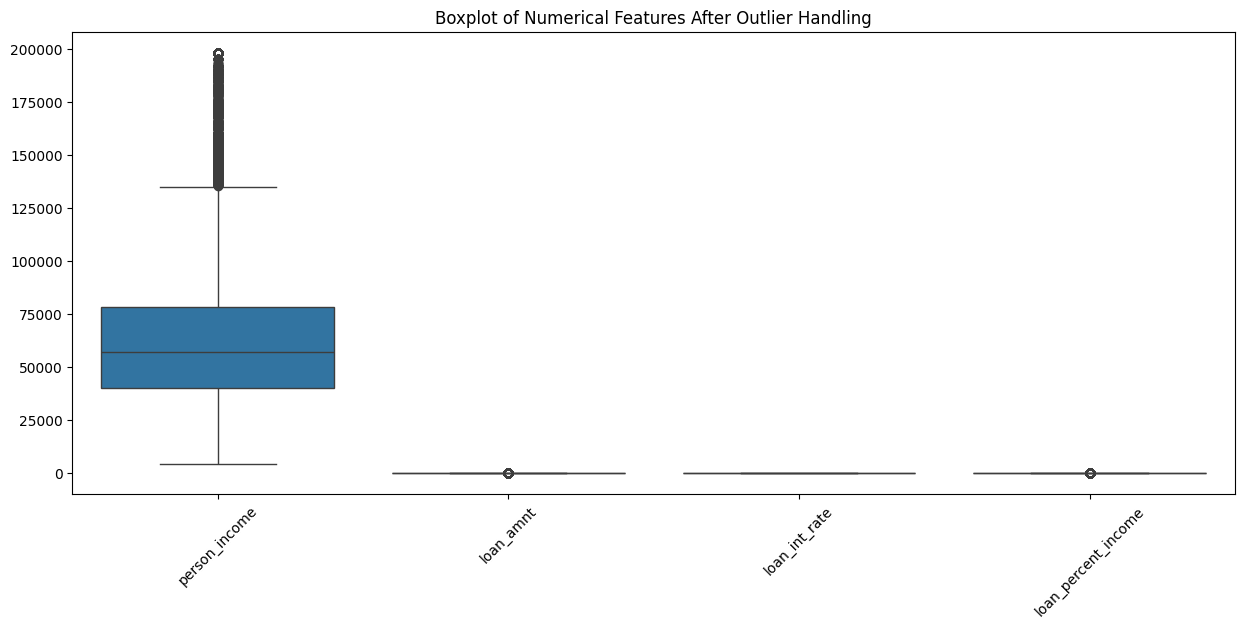

In [34]:
# Boxplot to visualize outliers after handling
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_train[['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']])
plt.title("Boxplot of Numerical Features After Outlier Handling")
plt.xticks(rotation=45)
plt.show()

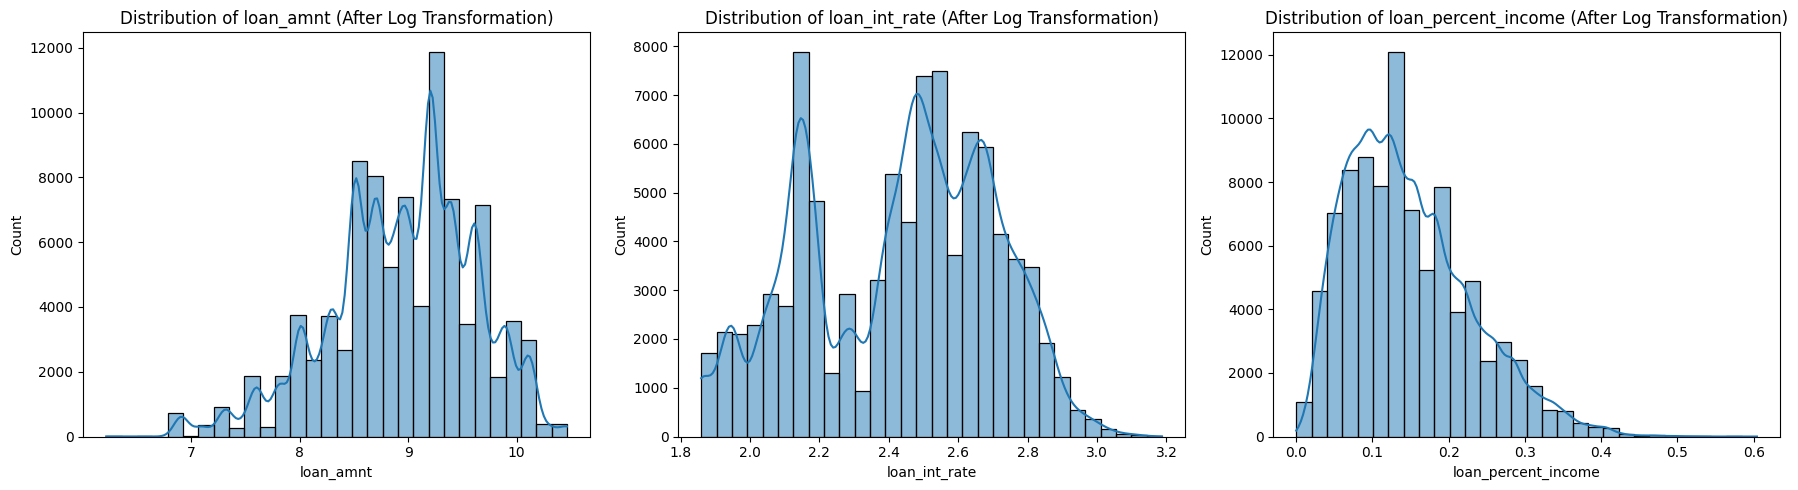

In [35]:
# Distribution plots to visualize log-transformed features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(['loan_amnt', 'loan_int_rate', 'loan_percent_income']):
    sns.histplot(df_train[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} (After Log Transformation)")

plt.tight_layout()
plt.show()

### Feature Engineeering

In [36]:
# 1️⃣ Debt-to-Income Ratio
df_train['debt_to_income_ratio'] = df_train['loan_amnt'] / df_train['person_income']

In [37]:
df_train['income_interest_interaction'] = df_train['person_income'] * df_train['loan_int_rate']

In [38]:
if 'person_age' in df_train.columns:
    df_train = df_train.drop(columns=['person_age'])

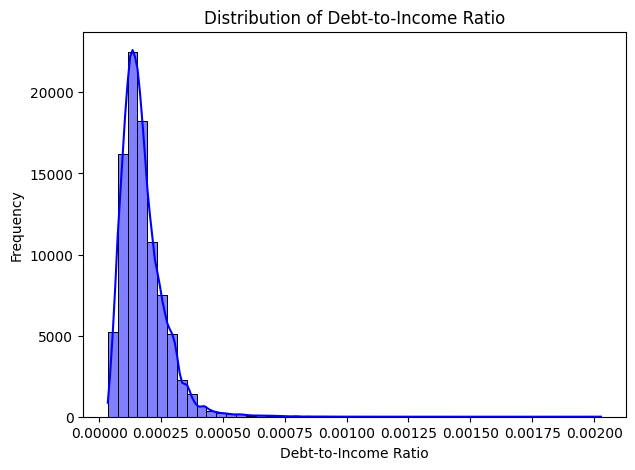

In [39]:
# 1️⃣ Distribution of `debt_to_income_ratio`
plt.figure(figsize=(7, 5))
sns.histplot(df_train['debt_to_income_ratio'], bins=50, kde=True, color="blue")
plt.title("Distribution of Debt-to-Income Ratio")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Frequency")
plt.show()

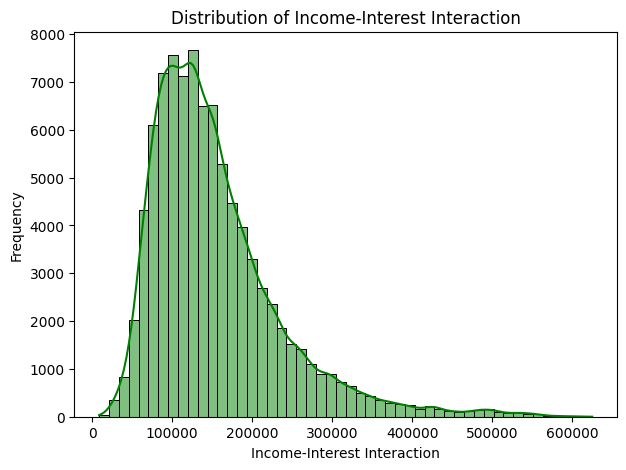

In [40]:
# 2️⃣ Distribution of `income_interest_interaction`
plt.figure(figsize=(7, 5))
sns.histplot(df_train['income_interest_interaction'], bins=50, kde=True, color="green")
plt.title("Distribution of Income-Interest Interaction")
plt.xlabel("Income-Interest Interaction")
plt.ylabel("Frequency")
plt.show()

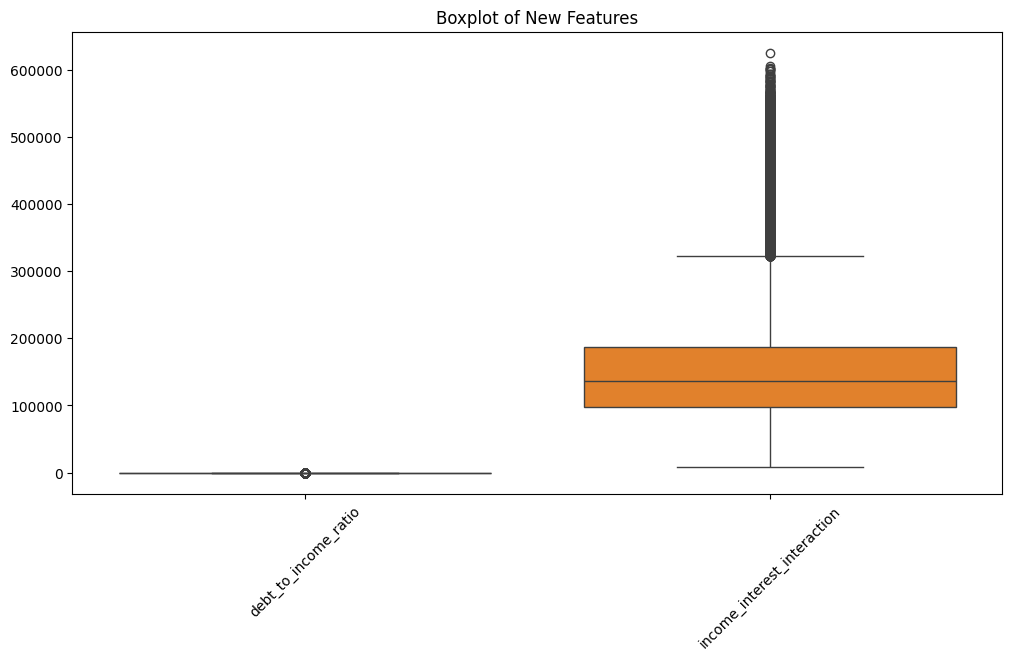

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train[['debt_to_income_ratio', 'income_interest_interaction']])
plt.title("Boxplot of New Features")
plt.xticks(rotation=45)
plt.show()

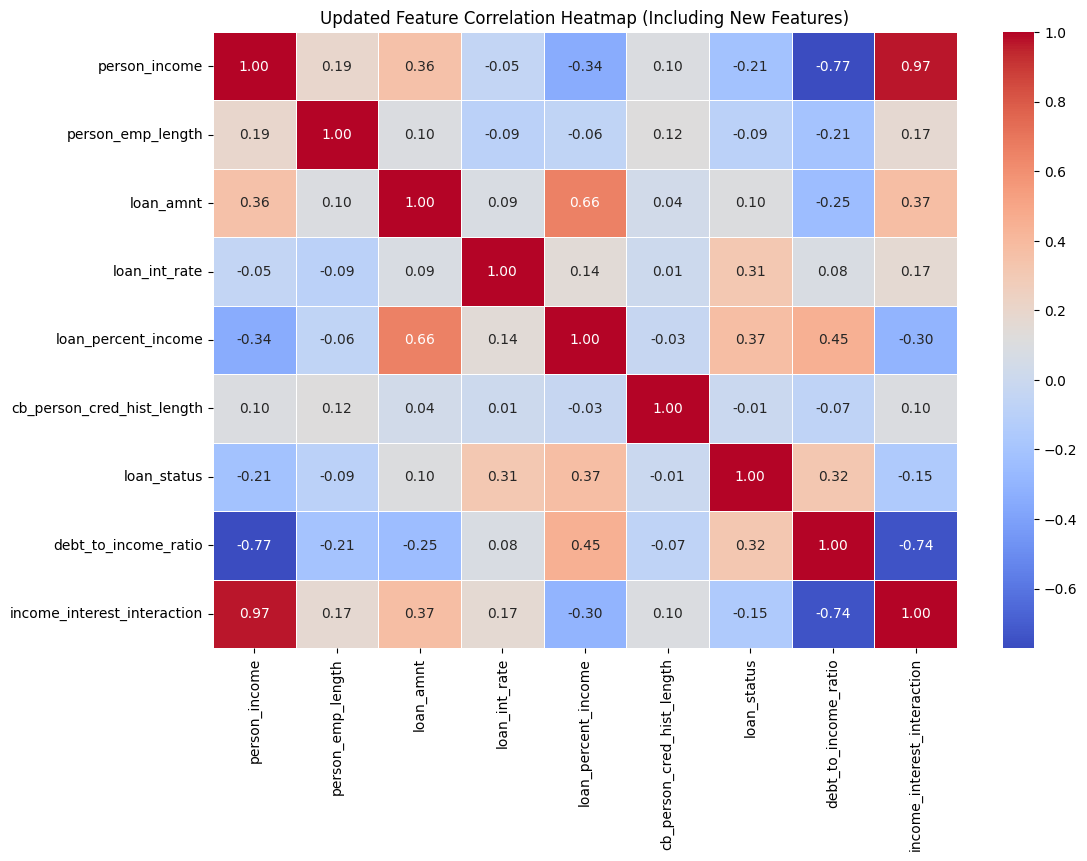

In [42]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Updated Feature Correlation Heatmap (Including New Features)")
plt.show()

### Encoding Categorical Features

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label_encoder = LabelEncoder()
df_train['loan_grade'] = label_encoder.fit_transform(df_train['loan_grade'])

In [45]:
df_train = pd.get_dummies(df_train, columns=['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], drop_first=True)

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91060 entries, 0 to 91059
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_income                91060 non-null  float64
 1   person_emp_length            91060 non-null  float64
 2   loan_grade                   91060 non-null  int32  
 3   loan_amnt                    91060 non-null  float64
 4   loan_int_rate                91060 non-null  float64
 5   loan_percent_income          91060 non-null  float64
 6   cb_person_cred_hist_length   91060 non-null  int64  
 7   loan_status                  91060 non-null  int64  
 8   debt_to_income_ratio         91060 non-null  float64
 9   income_interest_interaction  91060 non-null  float64
 10  person_home_ownership_OTHER  91060 non-null  bool   
 11  person_home_ownership_OWN    91060 non-null  bool   
 12  person_home_ownership_RENT   91060 non-null  bool   
 13  loan_intent_EDUC

# Drop Low-Importance Features Based on Feature Importance Analysis

### Handeling Class Imbalance

In [47]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [48]:
# Separating features (X) and target (y)
X = df_train.drop(columns=['loan_status'])
y = df_train['loan_status']

In [49]:
class_distribution_before = Counter(y)

In [50]:
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjusts minority class to 50% of majority class
X_resampled, y_resampled = smote.fit_resample(X, y)

In [51]:
class_distribution_after = Counter(y_resampled)

print("Class Distribution Before SMOTE:", class_distribution_before)
print("Class Distribution After SMOTE:", class_distribution_after)

Class Distribution Before SMOTE: Counter({0: 75621, 1: 15439})
Class Distribution After SMOTE: Counter({0: 75621, 1: 37810})


C:\Users\Manjil\AppData\Local\Temp\ipykernel_20828\3845984830.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Loan Status", y="Before SMOTE", data=imbalance_df, palette="Blues", ax=axes[0])
C:\Users\Manjil\AppData\Local\Temp\ipykernel_20828\3845984830.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Loan Status", y="After SMOTE", data=imbalance_df, palette="Reds", ax=axes[1])


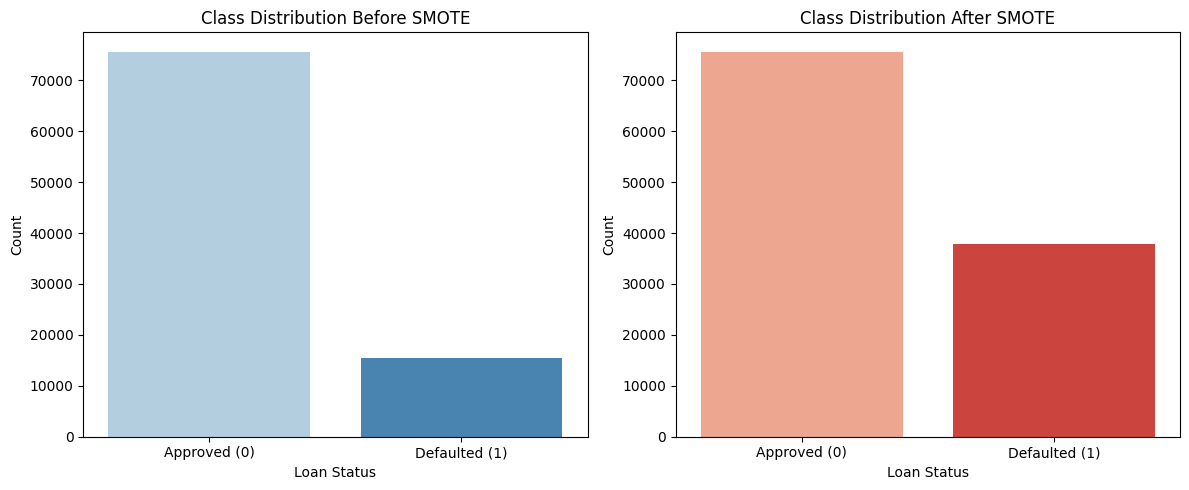

In [52]:
# Convert class distribution to DataFrame for visualization
imbalance_df = pd.DataFrame({
    "Loan Status": ["Approved (0)", "Defaulted (1)"],
    "Before SMOTE": [class_distribution_before[0], class_distribution_before[1]],
    "After SMOTE": [class_distribution_after[0], class_distribution_after[1]]
})

# Plot class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.barplot(x="Loan Status", y="Before SMOTE", data=imbalance_df, palette="Blues", ax=axes[0])
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_ylabel("Count")

# After SMOTE
sns.barplot(x="Loan Status", y="After SMOTE", data=imbalance_df, palette="Reds", ax=axes[1])
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


## Model Training

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X = X_resampled
y = y_resampled

In [55]:
X.columns

Index(['person_income', 'person_emp_length', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'debt_to_income_ratio', 'income_interest_interaction',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'cb_person_default_on_file_Y'],
      dtype='object')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_resampled)

In [57]:

# Define Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}



Training Random Forest...
Random Forest Accuracy: 0.9407
Random Forest AUC-ROC: 0.9761
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     15125
           1       0.96      0.86      0.91      7562

    accuracy                           0.94     22687
   macro avg       0.95      0.92      0.93     22687
weighted avg       0.94      0.94      0.94     22687

--------------------------------------------------


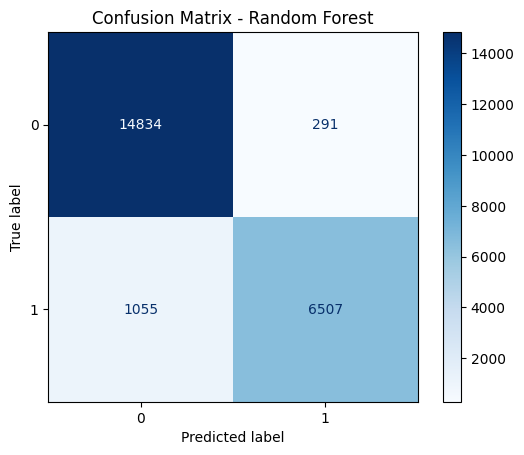

Training XGBoost...


c:\Users\Manjil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:05:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9509
XGBoost AUC-ROC: 0.9797
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15125
           1       0.97      0.88      0.92      7562

    accuracy                           0.95     22687
   macro avg       0.96      0.93      0.94     22687
weighted avg       0.95      0.95      0.95     22687

--------------------------------------------------


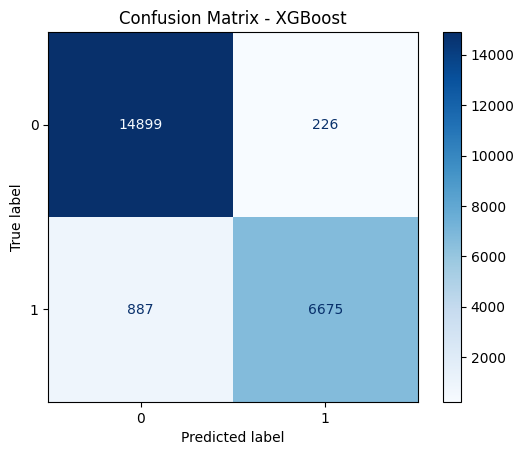

Training CatBoost...
CatBoost Accuracy: 0.9562
CatBoost AUC-ROC: 0.9819
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15125
           1       0.98      0.89      0.93      7562

    accuracy                           0.96     22687
   macro avg       0.96      0.94      0.95     22687
weighted avg       0.96      0.96      0.96     22687

--------------------------------------------------


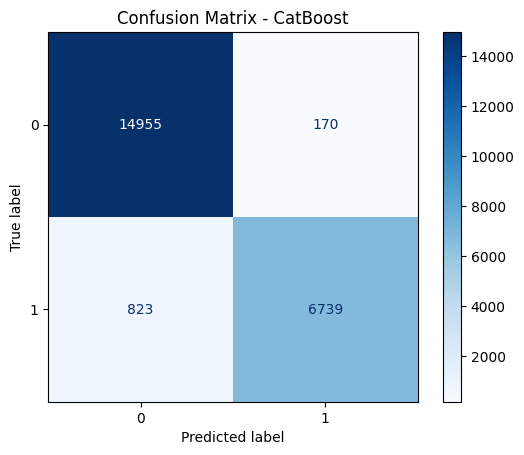

Final Model Accuracies: {'Random Forest': 0.9406708687794773, 'XGBoost': 0.9509410675717371, 'CatBoost': 0.9562304403402829}
Final Model AUC-ROC Scores: {'Random Forest': 0.976071842465918, 'XGBoost': 0.9796726039943083, 'CatBoost': 0.9818574210766753}


In [58]:
results = {}
auc_scores = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    
    results[model_name] = accuracy
    auc_scores[model_name] = auc_roc
    
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} AUC-ROC: {auc_roc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Display Final Model Metrics
print("Final Model Accuracies:", results)
print("Final Model AUC-ROC Scores:", auc_scores)

c:\Users\Manjil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:05:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Manjil\AppData\Local\Temp\ipykernel_20828\491256816.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=xgb_importance, palette="Oranges_r")


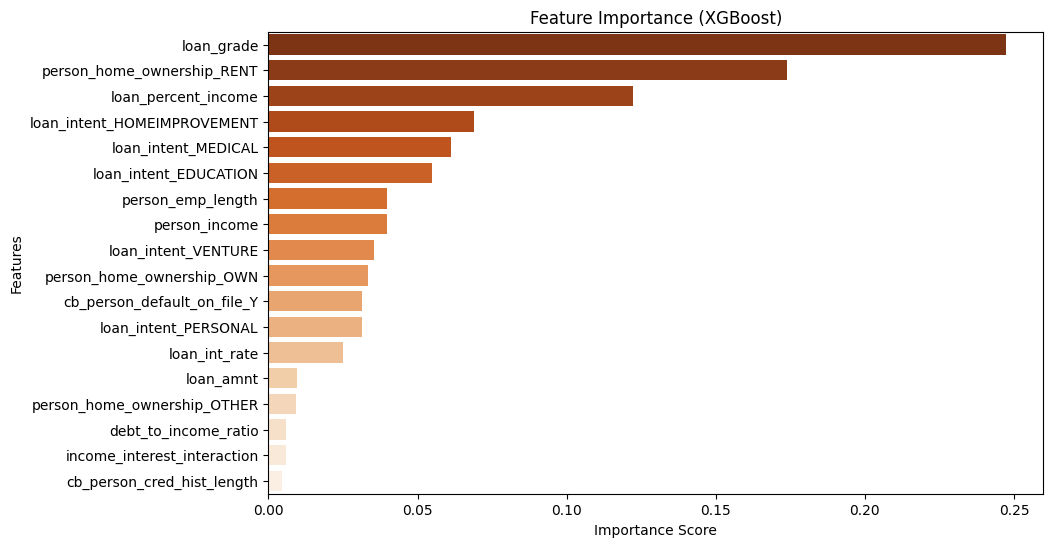

In [59]:
# Feature Importance for XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": xgb_model.feature_importances_}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance for XGBoost
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=xgb_importance, palette="Oranges_r")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

C:\Users\Manjil\AppData\Local\Temp\ipykernel_20828\1810103830.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=cat_importance, palette="Greens_r")


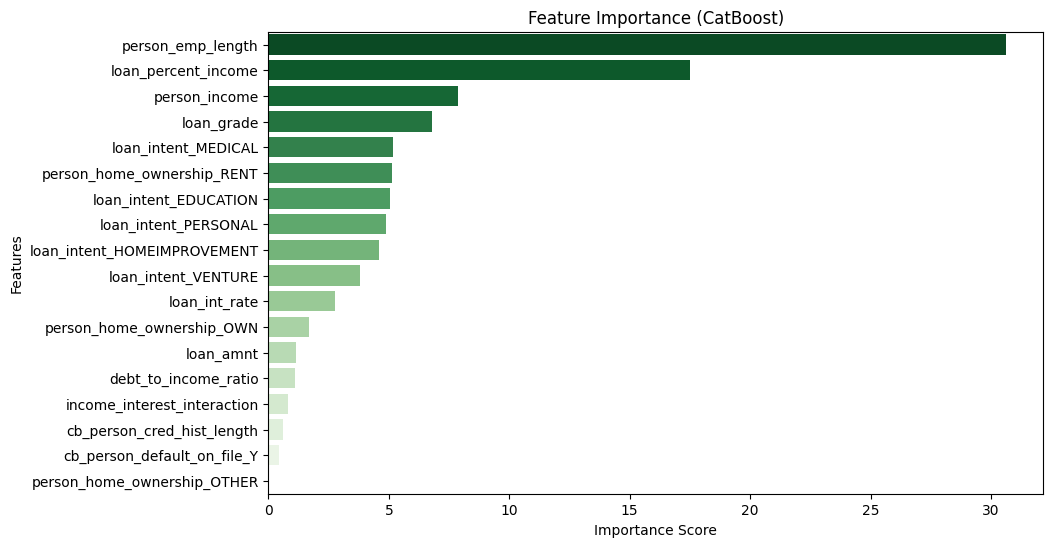

In [60]:
# Feature Importance for CatBoost
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
cat_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": cat_model.get_feature_importance()}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance for CatBoost
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=cat_importance, palette="Greens_r")
plt.title("Feature Importance (CatBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### **📌 Key Differences Between XGBoost & CatBoost**
| **Feature**               | **XGBoost Rank** | **CatBoost Rank** | **Remarks** |
|---------------------------|-----------------|-----------------|-------------|
| **Loan Grade (`loan_grade`)** | **#1** ✅ | #4 🔻 | **XGBoost strongly relies on loan grades**. |
| **Employment Length (`person_emp_length`)** | #6 🔻 | **#1** ✅ | **CatBoost prioritizes job stability more**. |
| **Loan Percent Income (`loan_percent_income`)** | **#3** ✅ | **#2** ✅ | **Both models agree this is highly important**. |
| **Home Ownership (`person_home_ownership_RENT`)** | **#2** ✅ | #6 🔻 | **XGBoost weighs this factor more heavily**. |
| **Person Income (`person_income`)** | #7 🔻 | **#3** ✅ | **CatBoost considers personal income more predictive**. |

---

### **📌 Insights from Both Models**
- **Loan Grade & Debt-to-Income Ratio are consistently strong predictors** of default.
- **Employment Length is more important in CatBoost**, suggesting that stable job history influences creditworthiness.
- **Home Ownership matters more in XGBoost**, indicating that renters may have **higher default risk**.
- **Loan Purpose impacts prediction accuracy**, with Medical & Education loans showing potential risks.

In [61]:
df_train.columns


Index(['person_income', 'person_emp_length', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status', 'debt_to_income_ratio', 'income_interest_interaction',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'cb_person_default_on_file_Y'],
      dtype='object')

In [62]:
# Drop Low-Importance Features Based on Feature Importance Analysis
low_importance_features = ['cb_person_cred_hist_length', 'person_home_ownership_OTHER', 'income_interest_interaction']
X = X.drop(columns=low_importance_features)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_resampled)

Training XGBoost...


c:\Users\Manjil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:06:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9513
XGBoost AUC-ROC: 0.9806
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15125
           1       0.97      0.88      0.92      7562

    accuracy                           0.95     22687
   macro avg       0.96      0.93      0.94     22687
weighted avg       0.95      0.95      0.95     22687

--------------------------------------------------


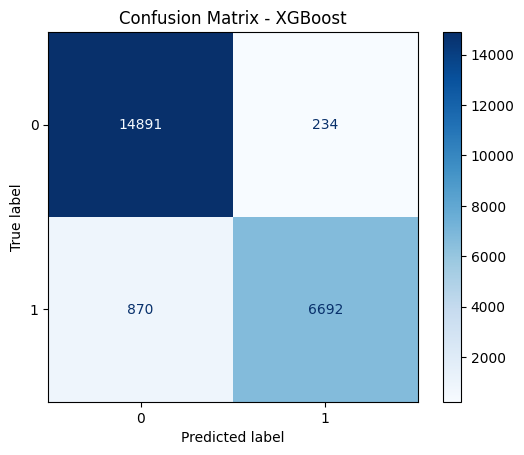

Training CatBoost...
CatBoost Accuracy: 0.9555
CatBoost AUC-ROC: 0.9821
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15125
           1       0.97      0.89      0.93      7562

    accuracy                           0.96     22687
   macro avg       0.96      0.94      0.95     22687
weighted avg       0.96      0.96      0.95     22687

--------------------------------------------------


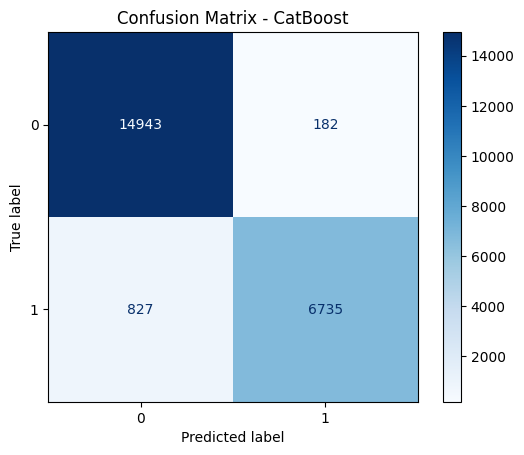

Final Model Accuracies After Feature Reduction: {'XGBoost': 0.9513377705293781, 'CatBoost': 0.9555251906378102}
Final Model AUC-ROC Scores After Feature Reduction: {'XGBoost': 0.98055593758265, 'CatBoost': 0.9820910336808008}


In [64]:
# Model Training and Evaluation
models = {
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

results = {}
auc_scores = {}
# Train and Evaluate Models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] 
    
    # Evaluate Model Performance
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    
    results[model_name] = accuracy
    auc_scores[model_name] = auc_roc
    
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} AUC-ROC: {auc_roc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
# Display results

# Display Final Model Metrics After Feature Reduction
print("Final Model Accuracies After Feature Reduction:", results)
print("Final Model AUC-ROC Scores After Feature Reduction:", auc_scores)


# Hyperparamater tunning 

In [65]:
import optuna

### Uncomment it to run 

In [ ]:
# # Hyperparameter Optimization with Optuna for XGBoost

# def objective_xgb(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0),
#         'use_label_encoder': False,
#         'eval_metric': 'logloss'
#     }
    
#     model = xgb.XGBClassifier(**params, random_state=42)
#     model.fit(X_train, y_train)
#     y_pred = model.predict_proba(X_test)[:, 1]
#     auc_roc = roc_auc_score(y_test, y_pred)
#     return auc_roc

# study_xgb = optuna.create_study(direction='maximize')
# study_xgb.optimize(objective_xgb, n_trials=50)
# best_xgb_params = study_xgb.best_params

# print("Best Hyperparameters for XGBoost:", best_xgb_params)

In [ ]:
# # Hyperparameter Optimization with Optuna for CatBoost

# def objective_cat(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 500, 2000),
#         'depth': trial.suggest_int('depth', 4, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0),
#         'random_strength': trial.suggest_float('random_strength', 1.0, 10.0),
#         'border_count': trial.suggest_int('border_count', 32, 255),
#         'loss_function': 'Logloss',
#         'verbose': 0
#     }
    
#     model = CatBoostClassifier(**params, random_state=42)
#     model.fit(X_train, y_train)
#     y_pred = model.predict_proba(X_test)[:, 1]
#     auc_roc = roc_auc_score(y_test, y_pred)
#     return auc_roc

# study_cat = optuna.create_study(direction='maximize')
# study_cat.optimize(objective_cat, n_trials=50)
# best_cat_params = study_cat.best_params

# print("Best Hyperparameters for CatBoost:", best_cat_params)

## MOdel Training after the hyperparamater

In [69]:
# Model Training and Evaluation
best_xgb_params = {'n_estimators': 366, 
                   'max_depth': 9, 
                   'learning_rate': 0.13056292703175218, 
                   'subsample': 0.97218711897614, 
                   'colsample_bytree': 0.5464682533537326, 
                   'reg_lambda': 2.6136450957909703}

best_cat_params = {'iterations': 974,
                   'depth': 5,
                   'learning_rate': 0.16918020219203428,
                   'l2_leaf_reg': 1.2589199031634881,
                   'random_strength': 2.0793241965404112,
                   'border_count': 216}


In [70]:
tuned_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **best_xgb_params)
tuned_xgb.fit(X_train, y_train)

c:\Users\Manjil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:06:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5464682533537326, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.13056292703175218,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=366, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [71]:
tuned_cat = CatBoostClassifier(verbose=0, random_state=42, **best_cat_params)
tuned_cat.fit(X_train, y_train)

## Cross validation

In [72]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [73]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [74]:
# Perform cross-validation using AUC-ROC as the scoring metric
cv_scores = cross_val_score(tuned_xgb, X, y, scoring='roc_auc', cv=cv)

print("5-Fold Cross Validation AUC-ROC scores:", cv_scores)
print("Mean AUC-ROC: {:.4f}".format(np.mean(cv_scores)))

c:\Users\Manjil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:06:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Manjil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:06:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Manjil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:06:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } 

5-Fold Cross Validation AUC-ROC scores: [0.98228708 0.98226086 0.98156941 0.98105855 0.98199769]
Mean AUC-ROC: 0.9818


In [75]:
cv_scores_cat = cross_val_score(tuned_cat, X, y, scoring='roc_auc', cv=cv)

print("5-Fold Cross Validation AUC-ROC scores for CatBoost:", cv_scores_cat)
print("Mean AUC-ROC for CatBoost: {:.4f}".format(np.mean(cv_scores_cat)))

5-Fold Cross Validation AUC-ROC scores for CatBoost: [0.98246397 0.98307197 0.98218285 0.98163406 0.9831553 ]
Mean AUC-ROC for CatBoost: 0.9825


### 2. Predict on Test Set & Compute Metrics

In [76]:
# XGBoost Predictions and Metrics
y_pred_xgb = tuned_xgb.predict(X_test)
y_proba_xgb = tuned_xgb.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Model:")
print("Accuracy:", accuracy_xgb)
print("AUC-ROC:", auc_xgb)
print("Classification Report:\n", report_xgb)
print("Confusion Matrix:\n", cm_xgb)

XGBoost Model:
Accuracy: 0.9539383788072464
AUC-ROC: 0.9825459310471453
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     15125
           1       0.96      0.90      0.93      7562

    accuracy                           0.95     22687
   macro avg       0.96      0.94      0.95     22687
weighted avg       0.95      0.95      0.95     22687

Confusion Matrix:
 [[14858   267]
 [  778  6784]]


In [77]:
from sklearn.metrics import roc_curve, auc

In [78]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

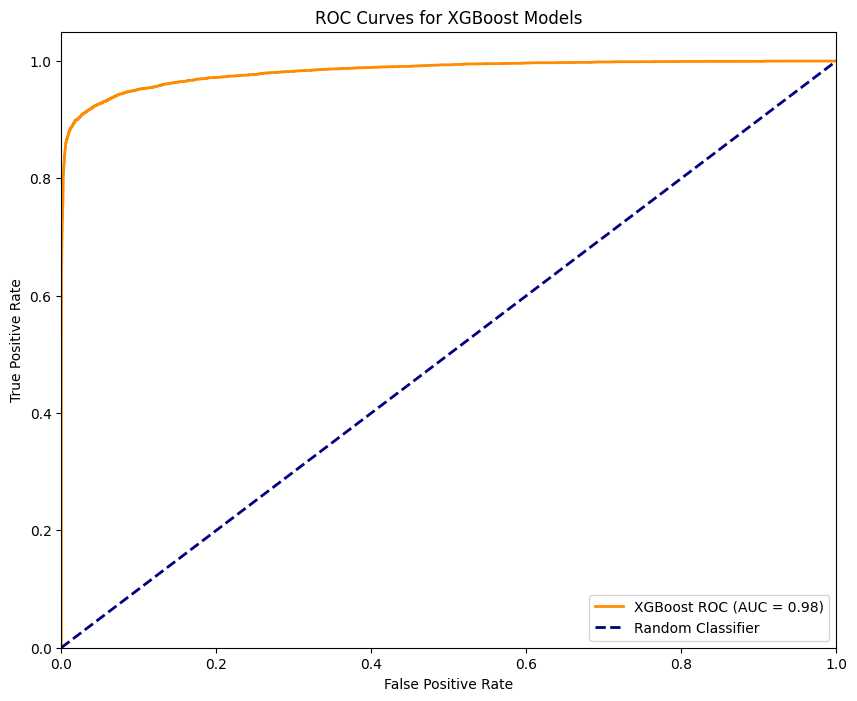

In [79]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost Models')
plt.legend(loc="lower right")
plt.show()

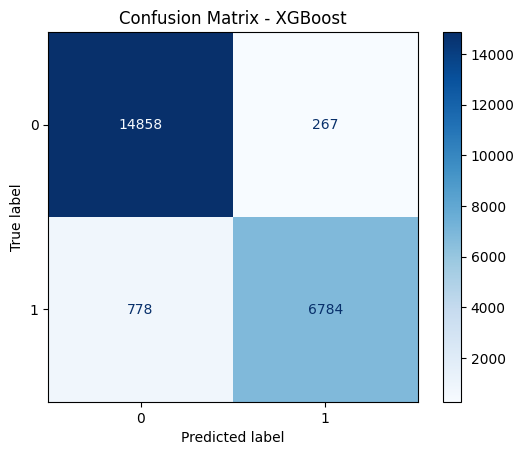

In [80]:
# Plot Confusion Matrix for XGBoost
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=tuned_xgb.classes_)
disp_xgb.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [81]:
# CatBoost Predictions and Metrics
y_pred_cat = tuned_cat.predict(X_test)
y_proba_cat = tuned_cat.predict_proba(X_test)[:, 1]

accuracy_cat = accuracy_score(y_test, y_pred_cat)
auc_cat = roc_auc_score(y_test, y_proba_cat)
report_cat = classification_report(y_test, y_pred_cat)
cm_cat = confusion_matrix(y_test, y_pred_cat)

print("CatBoost Model:")
print("Accuracy:", accuracy_cat)
print("AUC-ROC:", auc_cat)
print("Classification Report:\n", report_cat)
print("Confusion Matrix:\n", cm_cat)

CatBoost Model:
Accuracy: 0.9568034557235421
AUC-ROC: 0.9828991543187884
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     15125
           1       0.97      0.90      0.93      7562

    accuracy                           0.96     22687
   macro avg       0.96      0.94      0.95     22687
weighted avg       0.96      0.96      0.96     22687

Confusion Matrix:
 [[14924   201]
 [  779  6783]]


In [82]:
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)
roc_auc_cat = auc(fpr_cat, tpr_cat)

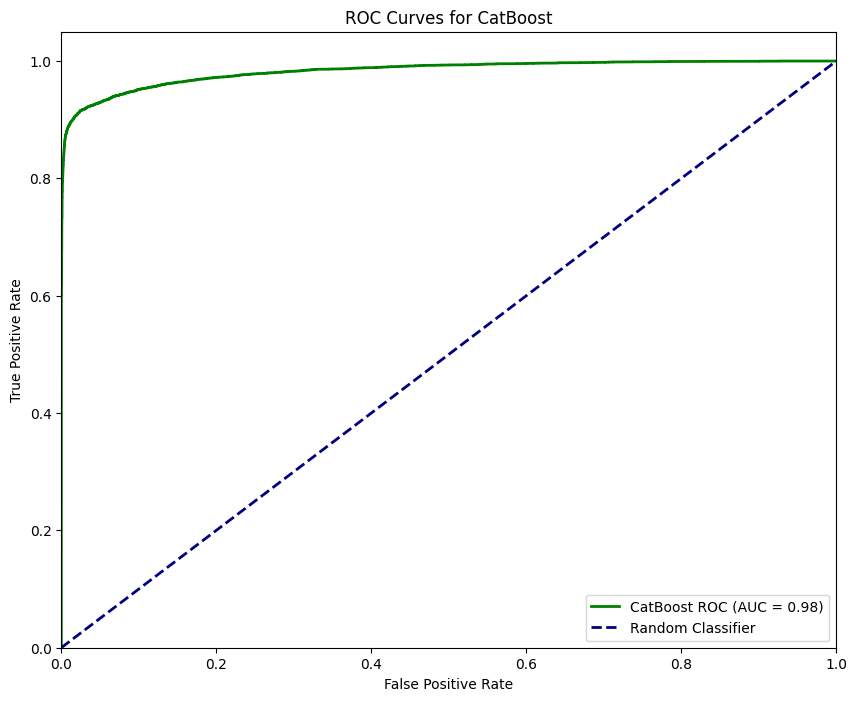

In [83]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_cat, tpr_cat, color='green', lw=2, label=f'CatBoost ROC (AUC = {roc_auc_cat:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for CatBoost')
plt.legend(loc="lower right")
plt.show()

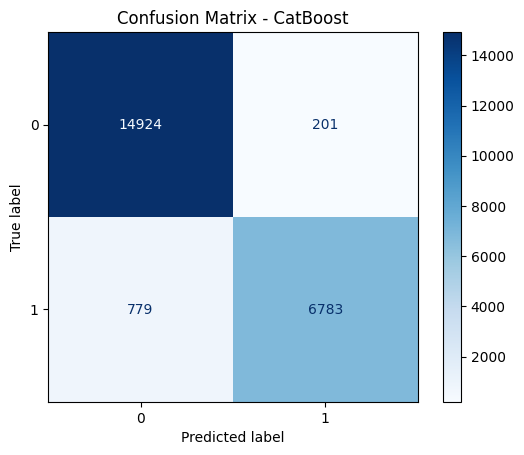

In [84]:
# Plot Confusion Matrix for CatBoost
disp_cat = ConfusionMatrixDisplay(confusion_matrix=cm_cat, display_labels=tuned_cat.classes_)
disp_cat.plot(cmap="Blues")
plt.title("Confusion Matrix - CatBoost")
plt.show()

In [ ]:
#Plot Learning Curves to Check Overfitting
from sklearn.model_selection import learning_curve, StratifiedKFold

def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, random_state=42
    )
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label="Training Score")
    plt.plot(train_sizes, val_mean, 'o-', color='g', label="Validation Score")
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel(scoring)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

c:\Users\Manjil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
23 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Manjil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Manjil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\Manjil\AppData\Local\Programs\Python\Python311\Lib\site-pac

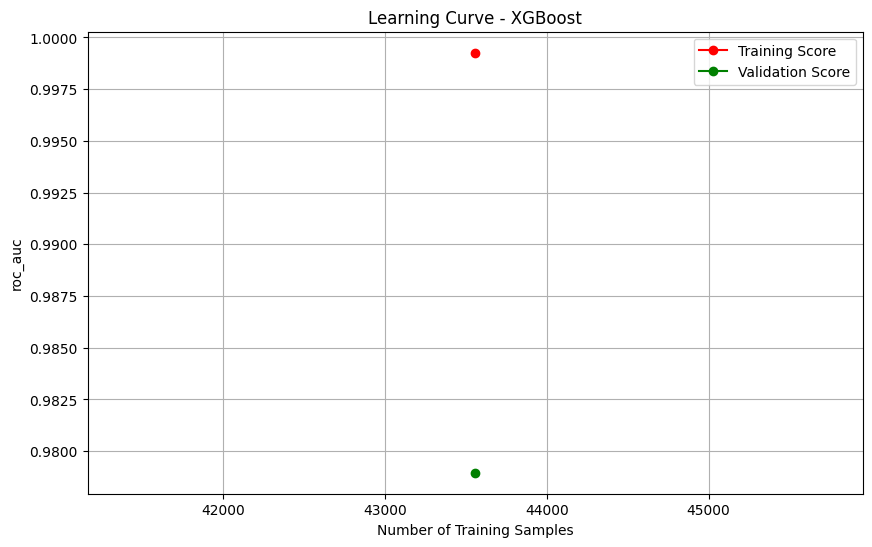

In [86]:
# Plot Learning Curve for XGBoost
plot_learning_curve(tuned_xgb, X_train, y_train, title="Learning Curve - XGBoost")


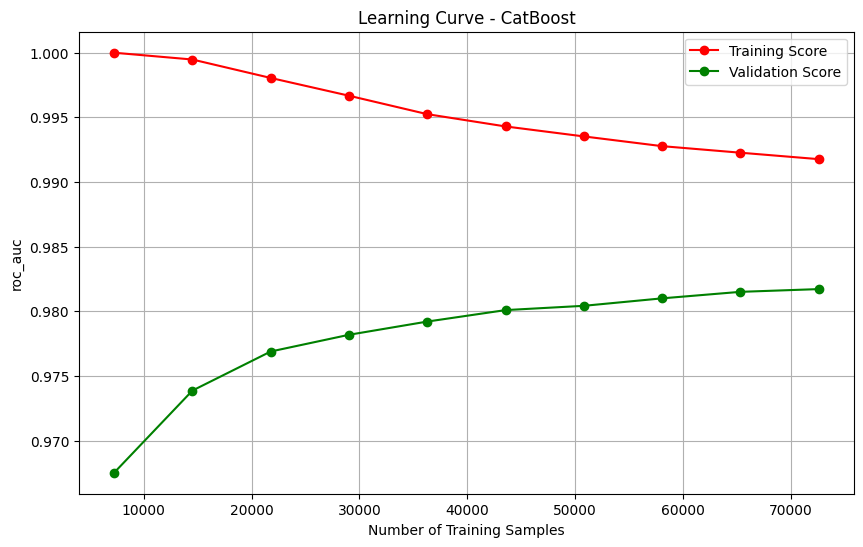

In [87]:
# Plot Learning Curve for CatBoost
plot_learning_curve(tuned_cat, X_train, y_train, title="Learning Curve - CatBoost")

In [88]:
import shap

In [89]:
shap.initjs()
explainer = shap.Explainer(tuned_cat)
shap_values = explainer(X_test)


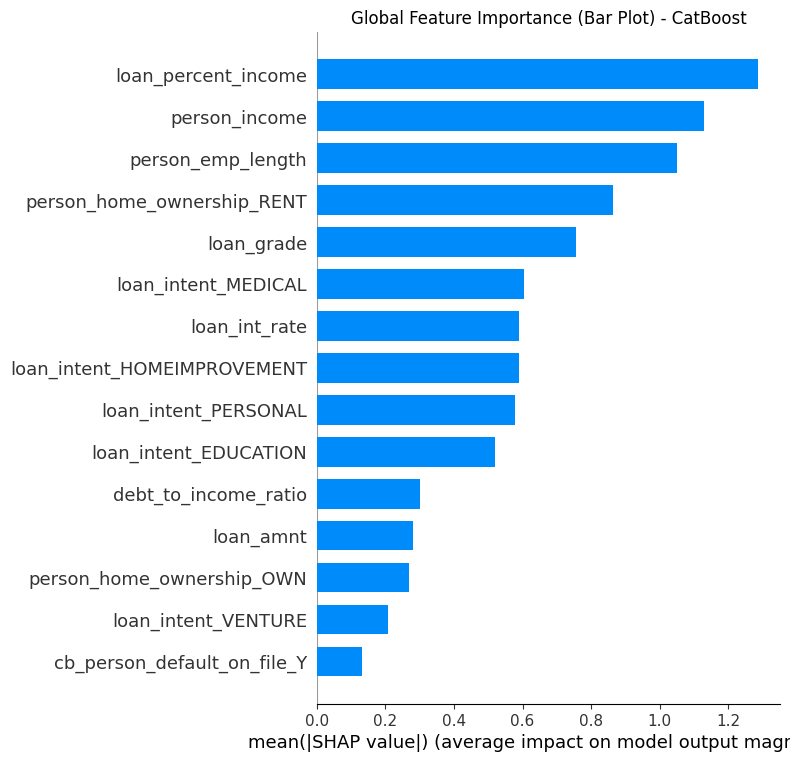

In [90]:
shap.summary_plot(
    shap_values, 
    X_test, 
    plot_type="bar", 
    feature_names=X_test.columns,
    show=False
)

plt.title("Global Feature Importance (Bar Plot) - CatBoost")

plt.show()

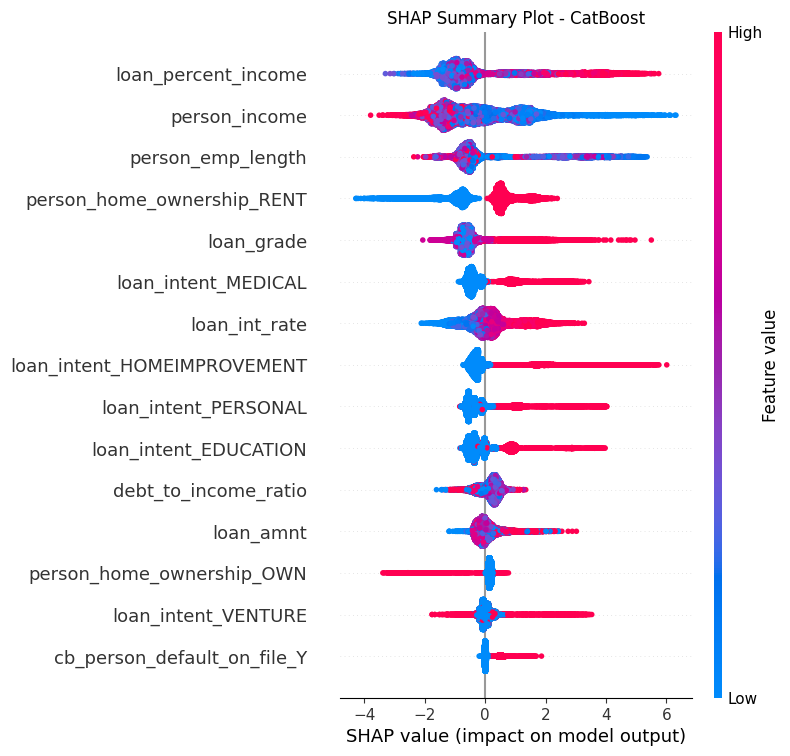

In [91]:
shap.summary_plot(
    shap_values, 
    X_test, 
    feature_names=X_test.columns,
    show=False
)
plt.title("SHAP Summary Plot - CatBoost")
plt.show()


## LIME

In [92]:
import lime
import lime.lime_tabular


In [93]:
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=["Approved", "Defaulted"],
    mode='classification',
    discretize_continuous=True  # Helps for continuous features
)

In [94]:
instance_index = 0
instance = X_test.iloc[instance_index].values


explanation = explainer_lime.explain_instance(
    data_row=instance,
    predict_fn=tuned_cat.predict_proba,
    num_features=10  
)


explanation.show_in_notebook(show_table=True)

## . Partial Dependence & ICE Plots

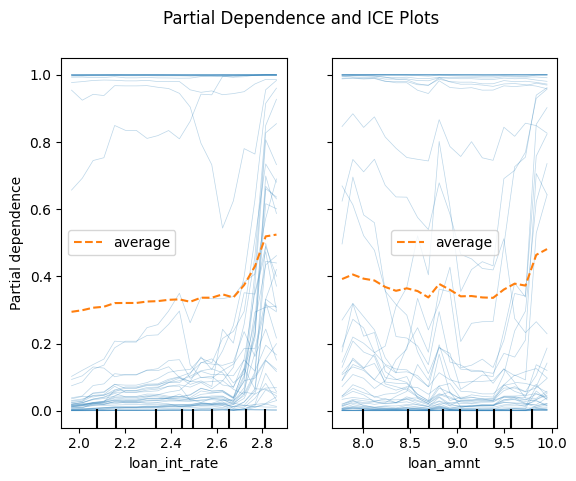

In [95]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


features_to_plot = ["loan_int_rate", "loan_amnt"]


PartialDependenceDisplay.from_estimator(
    tuned_cat,   
    X_test, 
    features=features_to_plot, 
    kind="both", 
    subsample=50,      
    grid_resolution=20
)
plt.suptitle("Partial Dependence and ICE Plots")
plt.show()


## Surrogate Model (Decision Tree)

In [96]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

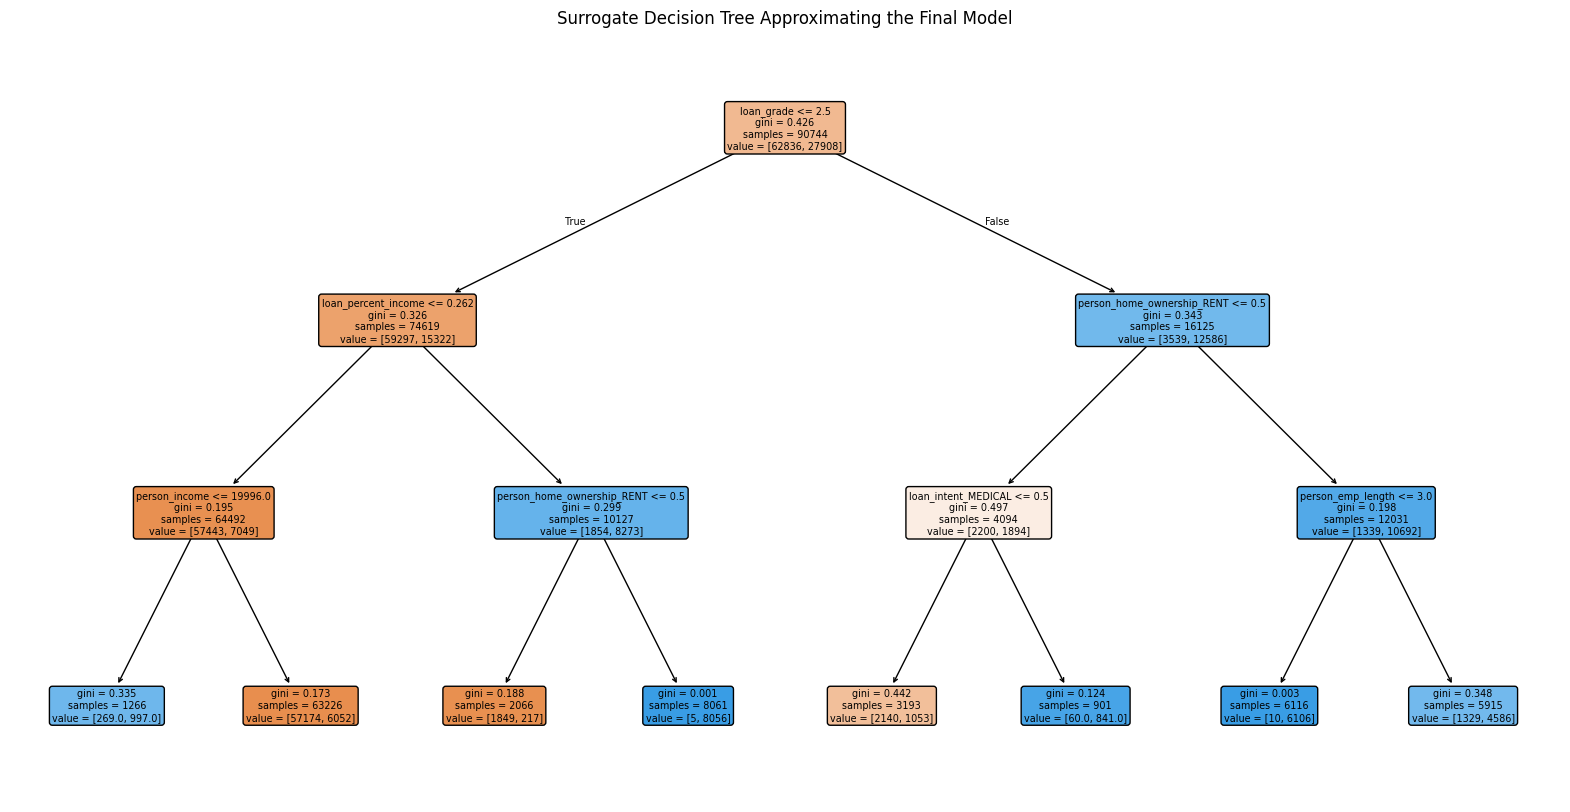

In [97]:

train_predictions = tuned_cat.predict(X_train)

surrogate_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
surrogate_tree.fit(X_train, train_predictions)

plt.figure(figsize=(20,10))
plot_tree(surrogate_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Surrogate Decision Tree Approximating the Final Model")
plt.show()


###  Evaluate Model on Test Data

In [98]:
test_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [ ]:
if "id" in test_df.columns:
    test_ids = test_df["id"]
else:
    test_ids = None

In [ ]:
if "id" in test_df.columns:
    test_df = test_df.drop(columns=["id"])

In [101]:
test_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


## Preprocess the Test Data

In [102]:
# (a) Apply the same log transformation for skewed features
for col in ['loan_amnt', 'loan_int_rate', 'loan_percent_income']:
    test_df[col] = np.log1p(test_df[col])

In [103]:
# (b) Feature Engineering: Create new features
test_df['debt_to_income_ratio'] = test_df['loan_amnt'] / test_df['person_income']
test_df['income_interest_interaction'] = test_df['person_income'] * test_df['loan_int_rate']

In [104]:
# (c) Drop columns that were dropped in training (for example, if you dropped low-importance features)
# Here we drop 'cb_person_cred_hist_length', 'person_home_ownership_OTHER', and 'income_interest_interaction'
test_df = test_df.drop(columns=['cb_person_cred_hist_length', 'person_home_ownership_OTHER', 'income_interest_interaction'], errors='ignore')

In [ ]:
# (d) Encoding Categorical Variables:
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
test_df['loan_grade'] = test_df['loan_grade'].map(grade_mapping)

In [106]:
# For other categorical variables, apply one-hot encoding with drop_first=True (as done in training)
test_df = pd.get_dummies(test_df, columns=['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], drop_first=True)

In [ ]:
final_feature_columns = X_train.columns
for col in final_feature_columns:
    if col not in test_df.columns:
        test_df[col] = 0
        
# Reorder columns to match training
test_df = test_df[final_feature_columns]

## Predict on Test Data

In [108]:
predictions = tuned_cat.predict(test_df)

In [109]:
pred_probas = tuned_cat.predict_proba(test_df)[:, 1]

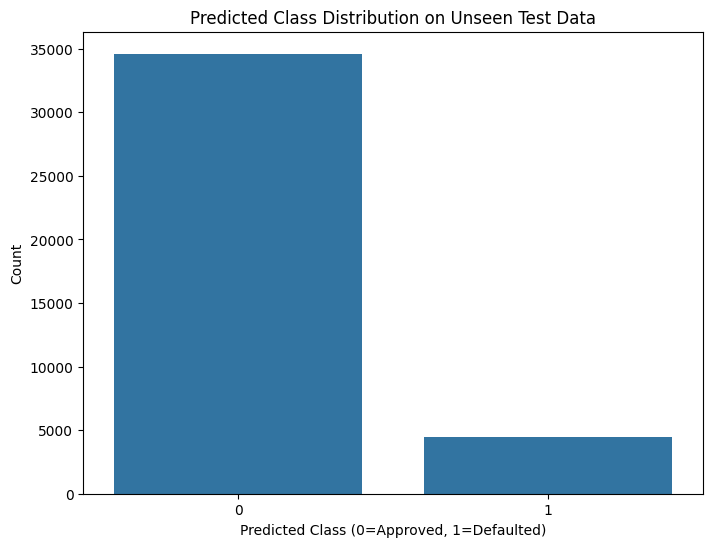

In [110]:
plt.figure(figsize=(8,6))
sns.countplot(x=predictions)
plt.title("Predicted Class Distribution on Unseen Test Data")
plt.xlabel("Predicted Class (0=Approved, 1=Defaulted)")
plt.ylabel("Count")
plt.show()

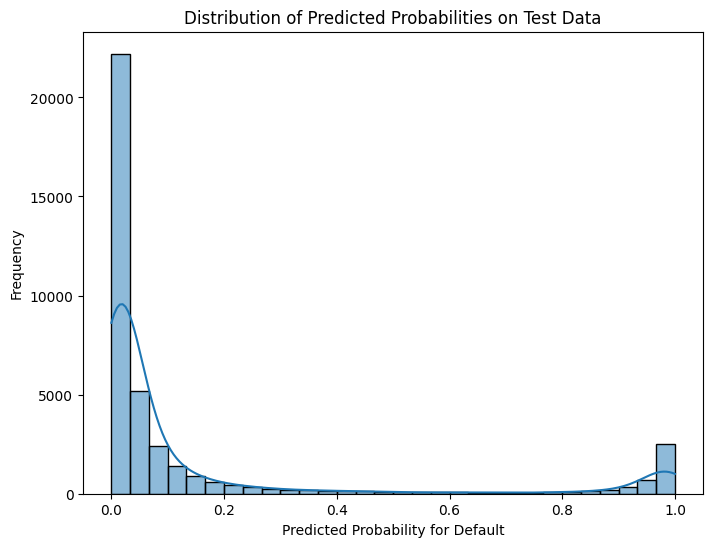

In [111]:
plt.figure(figsize=(8,6))
sns.histplot(pred_probas, bins=30, kde=True)
plt.title("Distribution of Predicted Probabilities on Test Data")
plt.xlabel("Predicted Probability for Default")
plt.ylabel("Frequency")
plt.show()

## Generate Submission File

In [112]:
sample_submission = pd.read_csv("Datasets/sample_submission.csv")

In [113]:
submission = sample_submission.copy()
submission['loan_status'] = predictions


if test_ids is not None:
    submission['id'] = test_ids

submission.to_csv("final_submission.csv", index=False)
print("Submission file 'final_submission.csv' has been generated.")

Submission file 'final_submission.csv' has been generated.


In [114]:
import joblib

joblib.dump(tuned_cat, "final_cat_model.pkl")
print("Final model has been saved as 'final_cat_model.pkl'.")


Final model has been saved as 'final_cat_model.pkl'.
